In [1]:
import csv
import json
import requests
import pprint

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

%matplotlib inline


In [2]:

pd.set_option('display.max_columns', None)
data = pd.read_csv('Second_half_2019_over0.csv', header=[0,1], index_col=0)

/Users/kimyoungwoo/Library/Python/3.7/lib/python/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data

l1               AP                     \
0             l2       IP Address        MAC Address   
2        3451965    172.20.146.92  08:17:35:c7:5c:50   
10        459471  164.125.168.248  10:8c:cf:10:8d:a0   
11         21181  164.125.175.247  84:3d:c6:ea:62:40   
12        459472  164.125.168.248  10:8c:cf:10:8d:a0   
14       5988729   172.20.138.131  00:62:ec:b7:82:80   
...          ...              ...                ...   
9204245  8364604  164.125.153.250  44:e4:d9:84:ad:60   
9204247  8368775  164.125.153.250  44:e4:d9:84:ad:60   
9204248  8368776  164.125.153.250  44:e4:d9:84:ad:60   
9204525  8378229   164.125.58.249  a0:e0:af:cf:96:80   
9204898  8380755   164.125.58.249  a0:e0:af:cf:96:80   

                                                                     \
0                                       Map Location           Name   
2                      PUSAN-OUTDOOR > PUSAN-OUTDOOR  11S-508-OUT-2   
10                     PUSAN-OUTDOOR > PUSAN-OUTDOOR    SAP-168.248   
11                   Pusan > GunSul (401) > GunSul2F   16AP-401-2-1   
12                     PUSAN-OUTDOOR > PUSAN-OUTDOOR    SAP-168.248   
14                 Pusan > 1Sabeom (417) > 1SaBeom3F    16K-417-3-1   
...                                              ...            ...   
9204245  Pusan > HyoWonSanHak (506) > HyoWonSanHak5F    SAP-153.250   
9204247  Pusan > HyoWonSanHak (506) > HyoWonSanHak5F    SAP-153.250   
9204248  Pusan > HyoWonSanHak (506) > HyoWonSanHak5F    SAP-153.250   
9204525                    Pusan > Silhum (111) > 1F   17AP-111-1-1   
9204898                    Pusan > Silhum (111) > 1F   17AP-111-1-1   

                        Client                                         \
0                Endpoint Type       IP Address MAC Address      SSID   
2                   Android-LG   164.125.250.67           0  PNU-WiFi   
10                  Android-LG  164.125.250.193           0  PNU-WiFi   
11                  Android-LG  164.125.250.193           0  PNU-WiFi   
12                  Android-LG  164.125.250.193           0  PNU-WiFi   
14                     Android   164.125.248.38           0  PNU-WiFi   
...                        ...              ...         ...       ...   
9204245  Microsoft-Workstation    172.21.41.178       63166   eduroam   
9204247  Microsoft-Workstation   164.125.250.32       63167  PNU-WiFi   
9204248  Microsoft-Workstation   164.125.250.32       63167  PNU-WiFi   
9204525  Microsoft-Workstation   164.125.248.85       63176  PNU-WiFi   
9204898           Apple-iPhone     172.21.44.49       63181  PNU-WiFi   

        Session Duration                                          Utilization  \
0                   days hours minutes seconds Avg. Session Throughput (Kbps)   
2                      0     0      35       6                            6.8   
10                     0     0       5       2                            4.2   
11                     0     1      21       9                          115.2   
12                     0     1      23      40                           18.4   
14                     0     1      15      43                           16.5   
...                  ...   ...     ...     ...                            ...   
9204245                0     0      15       7                        4,338.3   
9204247                0     0       5       0                          941.8   
9204248                0     0      15       5                        1,814.9   
9204525                0     1       5      31                        1,344.7   
9204898                0     0      10       1                            2.2   

                                                                              \
0       Bytes Received Bytes Sent Data Retries Packets Received Packets Sent   
2               159257      95660          278              327          383   
10              344101     132199        15411              693          787   
11            51125667    5383309    

In [4]:
Kukje_floor = []
Kukje_floor.append(data[data[('AP','Map Location')] == 'Pusan > KukJe (516) > KukJe B1F'])
Kukje_floor.append(data[data[('AP','Map Location')] == 'Pusan > KukJe (516) > KukJe 1F'])
Kukje_floor.append(data[data[('AP','Map Location')] == 'Pusan > KukJe (516) > KukJe 2F'])
Kukje_floor.append(data[data[('AP','Map Location')] == 'Pusan > KukJe (516) > KukJe 3F'])
Kukje_floor.append(data[data[('AP','Map Location')] == 'Pusan > KukJe (516) > KukJe 4F'])
Kukje_floor.append(data[data[('AP','Map Location')] == 'Pusan > KukJe (516) > KukJe 5F'])
Kukje_floor.append(data[data[('AP','Map Location')] == 'Pusan > KukJe (516) > KukJe 6F'])
Kukje_floor.append(data[data[('AP','Map Location')] == 'Pusan > KukJe (516) > KukJe 7F'])
Kukje_floor.append(data[data[('AP','Map Location')] == 'Pusan > KukJe (516) > KukJe 8F'])
Kukje_floor.append(data[data[('AP','Map Location')] == 'Pusan > KukJe (516) > KukJe 9F'])

Kukje = pd.concat(Kukje_floor)
Kukje

l1               AP                     \
0             l2       IP Address        MAC Address   
16247    1273236  164.125.180.202  64:e9:50:05:59:80   
16249    1287523  164.125.180.208  64:e9:50:05:5a:40   
21985    1267976  164.125.180.201  64:e9:50:05:61:10   
21990    1267910  164.125.180.201  64:e9:50:05:61:10   
22008    1267977  164.125.180.201  64:e9:50:05:61:10   
...          ...              ...                ...   
8150659  1788614  164.125.182.234  64:e9:50:05:50:d0   
8150713  1788666  164.125.182.234  64:e9:50:05:50:d0   
8150735  1788793  164.125.182.234  64:e9:50:05:50:d0   
8150736  1788735  164.125.182.234  64:e9:50:05:50:d0   
8150739  1788861  164.125.182.234  64:e9:50:05:50:d0   

                                                                     Client  \
0                           Map Location        Name          Endpoint Type   
16247    Pusan > KukJe (516) > KukJe B1F  AP-180.202      Linux-Workstation   
16249    Pusan > KukJe (516) > KukJe B1F  AP-180.208      Linux-Workstation   
21985    Pusan > KukJe (516) > KukJe B1F  AP-180.201                   none   
21990    Pusan > KukJe (516) > KukJe B1F  AP-180.201      Linux-Workstation   
22008    Pusan > KukJe (516) > KukJe B1F  AP-180.201                   none   
...                                  ...         ...                    ...   
8150659   Pusan > KukJe (516) > KukJe 9F  AP-182.234                iPad7,5   
8150713   Pusan > KukJe (516) > KukJe 9F  AP-182.234      Linux-Workstation   
8150735   Pusan > KukJe (516) > KukJe 9F  AP-182.234  Microsoft-Workstation   
8150736   Pusan > KukJe (516) > KukJe 9F  AP-182.234  Microsoft-Workstation   
8150739   Pusan > KukJe (516) > KukJe 9F  AP-182.234             Android-LG   

                                               Session Duration                \
0             IP Address MAC Address      SSID             days hours minutes   
16247    164.125.249.149          25  PNU-WiFi                0     0       5   
16249    164.125.249.149          25  PNU-WiFi                0     0      15   
21985     164.125.250.67          29  PNU-WiFi                0     6      36   
21990     164.125.250.76          29  PNU-WiFi                0     0       5   
22008     164.125.250.67          29  PNU-WiFi                0     0       5   
...                  ...         ...       ...              ...   ...     ...   
8150659     172.21.38.56       38187  PNU-WiFi                0     0       5   
8150713    172.21.19.173       38189  PNU-WiFi                0     0       5   
8150735     172.21.19.53       38190  PNU-WiFi                0     0      45   
8150736     172.21.19.53       38190  PNU-WiFi                0     0      10   
8150739     172.21.4.252       38192  PNU-WiFi                0     0      10   

                                   Utilization                            \
0       seconds Avg. Session Throughput (Kbps) Bytes Received Bytes Sent   
16247         1                            2.3          59404      28611   
16249        11                            3.1          52930      18605   
21985        16                           97.6       28509954     893006   
21990         2                            0.4           8325       6358   
22008         0                            0.6          46726      24288   
...         ...                            ...            ...        ...   
8150659       0                            1.0          23926      14538   
8150713       0                            9.4         250459     102327   
8150735      36                           25.0        7688150     308520   
8150736       5                           25.0        7688150     308520   
8150739       2                           <0.1           1800       1062   

                                                                           \
0       Data Retries Packets Received Packets Sent RSSI (dBm) RTS Retries   
16247           1325              145          182        -6

In [17]:
set(data[('AP', 'Map Location')])

{'PUSAN-OUTDOOR > PUSAN-OUTDOOR',
 'Pusan > 12Gong (103) > 12Gong 1F',
 'Pusan > 12Gong (103) > 12Gong 2F',
 'Pusan > 12Gong (103) > 12Gong 3F',
 'Pusan > 1Sabeom (417) > 1SaBeom1F',
 'Pusan > 1Sabeom (417) > 1SaBeom2F',
 'Pusan > 1Sabeom (417) > 1SaBeom3F',
 'Pusan > 1Sabeom (417) > 1SaBeom4F',
 'Pusan > 1Sabeom (417) > 1SaBeom5F',
 'Pusan > 1_Factory (102) > 1_Factory 1F',
 'Pusan > 2BeobHak (608) > 2BeobHak 1F',
 'Pusan > 2BeobHak (608) > 2BeobHak 2F',
 'Pusan > 2BeobHak (608) > 2BeobHak 3F',
 'Pusan > 2BeobHak (608) > 2BeobHak 4F',
 'Pusan > 2BeobHak (608) > 2BeobHak 5F',
 'Pusan > 2SaBeom (701) > 2SaBeom1F',
 'Pusan > 2SaBeom (701) > 2SaBeom2F',
 'Pusan > 2SaBeom (701) > 2SaBeom3F',
 'Pusan > 3Gong (105) > 3Gong1F',
 'Pusan > 3Gong (105) > 3Gong2F',
 'Pusan > 3Gong (105) > 3Gong3F',
 'Pusan > 3Gong (105) > 3Gong4F',
 'Pusan > 3Gong (105) > 3Gong5F',
 'Pusan > BeobHak (609) > BeobHak1F',
 'Pusan > BeobHak (609) > BeobHak2F',
 'Pusan > BeobHak (609) > BeobHak3F',
 'Pusan > BeobHak (

In [5]:
print(Kukje['Utilization'].var())
print(Kukje['Utilization'].describe())

0
Bytes Received      4.311356e+16
Bytes Sent          3.864169e+15
Data Retries        2.441460e+09
Packets Received    2.517039e+10
Packets Sent        6.623590e+09
RSSI (dBm)          1.042945e+02
RTS Retries         0.000000e+00
SNR (dB)            1.142409e+02
dtype: float64
0      Bytes Received    Bytes Sent  Data Retries  Packets Received  \
count    2.683060e+05  2.683060e+05  2.683060e+05      2.683060e+05   
mean     4.107500e+07  4.034881e+06  1.862541e+04      3.252075e+04   
std      2.076380e+08  6.216244e+07  4.941113e+04      1.586518e+05   
min      0.000000e+00  1.200000e+01  0.000000e+00      0.000000e+00   
25%      1.009022e+05  5.821700e+04  1.215000e+03      2.600000e+02   
50%      2.003988e+06  4.121705e+05  5.075000e+03      2.591000e+03   
75%      2.147026e+07  2.080486e+06  1.719100e+04      1.946875e+04   
max      2.369478e+10  1.258055e+10  2.946873e+06      2.087932e+07   

0      Packets Sent     RSSI (dBm)  RTS Retries       SNR (dB)  
count  2.68306

In [10]:
Kukje_floor[2]['Utilization'].var()

0
Bytes Received      1.611275e+16
Bytes Sent          1.381843e+15
Data Retries        1.110546e+09
Packets Received    9.064068e+09
Packets Sent        2.778786e+09
RSSI (dBm)          1.059742e+02
RTS Retries         0.000000e+00
SNR (dB)            1.192806e+02
dtype: float64

In [11]:
for a in Kukje_floor :
    print(a.iloc[2][('AP', 'Map Location')])
    print("var is :", a['Utilization'].var())
    print("std is :", a[('Utilization','RSSI (dBm)')].std())

Pusan > KukJe (516) > KukJe B1F
var is : 0
Bytes Received      1.869115e+16
Bytes Sent          4.087070e+14
Data Retries        1.032226e+09
Packets Received    9.951390e+09
Packets Sent        2.185343e+09
RSSI (dBm)          1.417820e+02
RTS Retries         0.000000e+00
SNR (dB)            1.510461e+02
dtype: float64
std is : 11.907225272945272
Pusan > KukJe (516) > KukJe 1F
var is : 0
Bytes Received      9.812238e+16
Bytes Sent          5.374499e+15
Data Retries        5.145434e+09
Packets Received    5.617517e+10
Packets Sent        1.656289e+10
RSSI (dBm)          1.135369e+02
RTS Retries         0.000000e+00
SNR (dB)            1.173156e+02
dtype: float64
std is : 10.655369377543286
Pusan > KukJe (516) > KukJe 2F
var is : 0
Bytes Received      1.611275e+16
Bytes Sent          1.381843e+15
Data Retries        1.110546e+09
Packets Received    9.064068e+09
Packets Sent        2.778786e+09
RSSI (dBm)          1.059742e+02
RTS Retries         0.000000e+00
SNR (dB)            1.192806

In [12]:
gong3 = data[data[('AP', 'Map Location')] ==  'Pusan > 3Gong (105) > 3Gong2F']
APS = list(set(gong3[('AP', 'Name')]))
APS

['11S-105-2-4', '16AP-105-2-2', '16AP-105-2-1', '16AP-105-2-3']

In [16]:
for a in APS:
    b = gong3[gong3[('AP', 'Name')] == a]
    c = b
    print(b.iloc[1][('AP', 'Name')])
    print(b['Utilization'].var())
    print(c['Utilization'].describe())
    

11S-105-2-4
0
Bytes Received      2.574754e+16
Bytes Sent          1.632071e+14
Data Retries        6.114304e+09
Packets Received    1.400054e+10
Packets Sent        3.023413e+09
RSSI (dBm)          5.583018e+01
RTS Retries         0.000000e+00
SNR (dB)            5.642913e+01
dtype: float64
0      Bytes Received    Bytes Sent  Data Retries  Packets Received  \
count    6.224000e+03  6.224000e+03  6.224000e+03      6.224000e+03   
mean     4.034764e+07  2.509285e+06  3.013602e+04      3.114464e+04   
std      1.604604e+08  1.277525e+07  7.819401e+04      1.183239e+05   
min      0.000000e+00  1.400000e+01  0.000000e+00      0.000000e+00   
25%      1.086995e+05  6.080775e+04  1.341000e+03      2.740000e+02   
50%      2.603317e+06  3.987540e+05  7.310500e+03      2.960000e+03   
75%      2.350351e+07  1.782063e+06  2.942650e+04      1.956850e+04   
max      6.454079e+09  7.064642e+08  1.513833e+06      4.880952e+06   

0      Packets Sent   RSSI (dBm)  RTS Retries     SNR (dB)  
count 

In [18]:
Tonghab = []
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > B1F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 1F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 2F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 3F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 4F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 5F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 6F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 7F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 8F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 9F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 10F'])
Tonghab.append(data[data[('AP','Map Location')] == 'Pusan > TohabGiGe (303) > 11F'])




In [54]:
APS = list(set(Tonghab_total[('AP', 'Name')]))
APS.sort()

In [58]:
for a in APS :
    b = Tonghab_total[Tonghab_total[('AP','Name')] == a]
    c = b
    print(b.iloc[2][('AP','Name')])

    print('Var')
    print(c['Utilization'].var())
    
    print('des')
    print(b['Utilization'].describe())

16AP-319-1-1
Var
0
Bytes Received      2.169504e+13
Bytes Sent          8.598336e+11
Data Retries        2.055293e+07
Packets Received    1.664926e+07
Packets Sent        9.619562e+06
RSSI (dBm)          4.850037e+01
RTS Retries         0.000000e+00
SNR (dB)            1.259175e+02
dtype: float64
des
0      Bytes Received    Bytes Sent  Data Retries  Packets Received  \
count    1.640000e+02  1.640000e+02    164.000000        164.000000   
mean     1.334460e+06  2.435392e+05   2677.597561       1366.762195   
std      4.657794e+06  9.272721e+05   4533.533695       4080.350292   
min      0.000000e+00  1.390000e+02      2.000000          0.000000   
25%      1.028500e+04  1.029775e+04    290.250000         44.500000   
50%      4.841300e+04  3.192250e+04    988.500000        143.000000   
75%      2.416102e+05  1.267418e+05   2622.500000        522.500000   
max      3.363803e+07  1.019668e+07  32730.000000      30125.000000   

0      Packets Sent  RSSI (dBm)  RTS Retries    SNR (dB)  

16AP-319-1-8
Var
0
Bytes Received      4.619507e+16
Bytes Sent          5.191410e+13
Data Retries        2.499874e+09
Packets Received    2.396823e+10
Packets Sent        1.547432e+09
RSSI (dBm)          6.592017e+01
RTS Retries         0.000000e+00
SNR (dB)            2.310452e+02
dtype: float64
des
0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    1.244000e+03  1.244000e+03    1244.000000      1.244000e+03   
mean     2.543077e+07  1.192886e+06   11404.566720      1.946244e+04   
std      2.149304e+08  7.205144e+06   49998.743485      1.548168e+05   
min      0.000000e+00  1.400000e+01       0.000000      0.000000e+00   
25%      2.114725e+04  1.834175e+04     413.750000      7.800000e+01   
50%      9.398800e+04  6.564400e+04    1224.000000      2.540000e+02   
75%      1.453512e+06  3.107662e+05    4094.500000      1.975000e+03   
max      5.573138e+09  1.931570e+08  793487.000000      3.984866e+06   

0       Packets Sent   RSSI (dBm)  RTS Retries   

0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    5.930000e+02  5.930000e+02     593.000000      5.930000e+02   
mean     8.290416e+07  7.104774e+06   14488.310287      6.416486e+04   
std      2.172526e+08  3.360007e+07   26987.360166      1.568277e+05   
min      6.400000e+01  4.600000e+01       4.000000      1.000000e+00   
25%      4.218970e+05  1.628290e+05    1272.000000      8.410000e+02   
50%      8.605262e+06  1.220262e+06    4850.000000      9.820000e+03   
75%      7.178806e+07  5.252976e+06   16930.000000      5.778000e+04   
max      3.161038e+09  5.273931e+08  311331.000000      2.234035e+06   

0      Packets Sent  RSSI (dBm)  RTS Retries    SNR (dB)  
count  5.930000e+02  593.000000        593.0  593.000000  
mean   3.484314e+04  -63.006745          0.0   31.163575  
std    8.126648e+04   10.670113          0.0   11.915889  
min    1.000000e+00  -90.000000          0.0    3.000000  
25%    1.022000e+03  -71.000000          0.0   22.000000

0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    1.100000e+02  1.100000e+02     110.000000        110.000000   
mean     1.375937e+07  1.187394e+06    7351.454545      11984.781818   
std      4.380822e+07  3.565125e+06   19646.003261      38280.155760   
min      5.800000e+01  1.570000e+02       2.000000          1.000000   
25%      2.434350e+04  1.939475e+04     190.000000         84.500000   
50%      2.010990e+05  8.298700e+04     676.000000        461.500000   
75%      1.694974e+06  6.230675e+05    3708.000000       2178.500000   
max      2.927789e+08  3.276851e+07  140682.000000     262970.000000   

0       Packets Sent  RSSI (dBm)  RTS Retries    SNR (dB)  
count     110.000000  110.000000        110.0  110.000000  
mean     7499.145455  -62.545455          0.0   30.590909  
std     27558.085612   11.554924          0.0   12.179314  
min         2.000000  -88.000000          0.0    5.000000  
25%       118.500000  -72.000000          0.0   21.

0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    2.375000e+03  2.375000e+03    2375.000000      2.375000e+03   
mean     3.241726e+07  5.203770e+06   17829.431158      2.589038e+04   
std      1.502761e+08  5.263975e+07   48953.029746      1.094409e+05   
min      0.000000e+00  1.900000e+01       2.000000      0.000000e+00   
25%      4.307500e+04  2.782750e+04    1036.500000      1.260000e+02   
50%      3.965400e+05  1.487840e+05    3762.000000      7.640000e+02   
75%      6.522741e+06  1.001770e+06   12801.000000      6.830000e+03   
max      3.929310e+09  2.064871e+09  588308.000000      2.744413e+06   

0      Packets Sent   RSSI (dBm)  RTS Retries     SNR (dB)  
count  2.375000e+03  2375.000000       2375.0  2375.000000  
mean   1.581160e+04   -74.853895          0.0    18.795789  
std    7.105323e+04     5.496890          0.0     7.923017  
min    1.000000e+00   -90.000000          0.0     1.000000  
25%    1.955000e+02   -79.000000          0.0 

0
Bytes Received      1.428858e+18
Bytes Sent          8.305562e+14
Data Retries        2.664806e+10
Packets Received    9.103551e+11
Packets Sent        7.073127e+10
RSSI (dBm)          1.340638e+02
RTS Retries         0.000000e+00
SNR (dB)            1.591204e+02
dtype: float64
des
0      Bytes Received    Bytes Sent  Data Retries  Packets Received  \
count    1.814000e+03  1.814000e+03  1.814000e+03      1.814000e+03   
mean     6.571933e+07  4.064263e+06  1.461945e+04      5.241615e+04   
std      1.195348e+09  2.881937e+07  1.632423e+05      9.541253e+05   
min      0.000000e+00  1.400000e+01  0.000000e+00      0.000000e+00   
25%      8.953325e+04  5.029150e+04  5.370000e+02      2.170000e+02   
50%      1.135410e+06  3.042230e+05  2.291000e+03      1.725000e+03   
75%      1.323841e+07  1.515767e+06  8.831250e+03      1.310600e+04   
max      5.061037e+10  7.020025e+08  6.813421e+06      4.042753e+07   

0      Packets Sent   RSSI (dBm)  RTS Retries     SNR (dB)  
count  1.81400

0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    1.069000e+03  1.069000e+03    1069.000000      1.069000e+03   
mean     4.839670e+07  3.171894e+06    7056.684752      3.754440e+04   
std      1.779635e+08  8.620104e+06   15703.353042      1.285475e+05   
min      0.000000e+00  1.900000e+01       1.000000      0.000000e+00   
25%      2.040190e+05  9.213800e+04     631.000000      4.200000e+02   
50%      4.317517e+06  6.424750e+05    2237.000000      4.525000e+03   
75%      3.175632e+07  2.711683e+06    6390.000000      2.723800e+04   
max      3.370293e+09  1.434455e+08  219739.000000      2.396682e+06   

0       Packets Sent   RSSI (dBm)  RTS Retries     SNR (dB)  
count    1069.000000  1069.000000       1069.0  1069.000000  
mean    20336.905519   -59.303087          0.0    32.419083  
std     53402.936141    12.064581          0.0    12.937051  
min         1.000000   -90.000000          0.0   -99.000000  
25%       592.000000   -69.000000        

0      Bytes Received    Bytes Sent  Data Retries  Packets Received  \
count    2.380000e+02  2.380000e+02  2.380000e+02        238.000000   
mean     1.970711e+07  3.590239e+06  4.427681e+04      16486.445378   
std      6.744132e+07  2.289190e+07  2.467703e+05      59179.803310   
min      0.000000e+00  5.100000e+02  2.800000e+01          0.000000   
25%      4.371425e+04  3.678275e+04  9.382500e+02        132.500000   
50%      3.314210e+05  1.784315e+05  3.085500e+03        709.500000   
75%      7.492513e+06  7.985642e+05  9.699000e+03       6624.000000   
max      5.752692e+08  2.394769e+08  2.458060e+06     553009.000000   

0       Packets Sent  RSSI (dBm)  RTS Retries    SNR (dB)  
count     238.000000  238.000000        238.0  238.000000  
mean    12145.756303  -71.697479          0.0   23.563025  
std     54946.177704    6.030939          0.0    9.311885  
min         5.000000  -84.000000          0.0    4.000000  
25%       260.250000  -76.000000          0.0   18.000000  


0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    5.450000e+02  5.450000e+02     545.000000        545.000000   
mean     1.771234e+07  1.387339e+06    8617.216514      14401.157798   
std      6.934947e+07  3.653953e+06   17533.563468      51580.379470   
min      0.000000e+00  9.200000e+01       7.000000          0.000000   
25%      3.930300e+04  3.479000e+04     630.000000        116.000000   
50%      3.978950e+05  1.702480e+05    2850.000000        715.000000   
75%      6.289878e+06  1.143951e+06    9286.000000       6001.000000   
max      1.038227e+09  4.062669e+07  201847.000000     751548.000000   

0       Packets Sent  RSSI (dBm)  RTS Retries    SNR (dB)  
count     545.000000  545.000000        545.0  545.000000  
mean     9633.425688  -71.436697          0.0   22.354128  
std     28165.802286    8.530877          0.0    9.730056  
min         2.000000  -91.000000          0.0    4.000000  
25%       230.000000  -78.000000          0.0   16.

0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    1.129000e+03  1.129000e+03    1129.000000       1129.000000   
mean     8.931423e+07  2.239631e+06   19684.653676      65592.346324   
std      1.404295e+08  4.594324e+06   25909.092439     100930.888773   
min      6.400000e+01  1.200000e+01       0.000000          1.000000   
25%      9.678820e+05  1.828740e+05    1654.000000       1635.000000   
50%      2.873124e+07  8.623340e+05   10762.000000      21853.000000   
75%      1.253378e+08  2.678626e+06   28983.000000      91520.000000   
max      9.753414e+08  9.879324e+07  217707.000000     698958.000000   

0       Packets Sent   RSSI (dBm)  RTS Retries     SNR (dB)  
count    1129.000000  1129.000000       1129.0  1129.000000  
mean    22964.507529   -70.857396          0.0    21.653676  
std     40842.823046     6.247272          0.0    11.610386  
min         1.000000   -87.000000          0.0  -121.000000  
25%      1332.000000   -75.000000        

0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    5.310000e+02  5.310000e+02     531.000000      5.310000e+02   
mean     2.066712e+07  7.340521e+06   20109.103578      1.707240e+04   
std      9.325922e+07  6.420545e+07   32911.189444      7.659659e+04   
min      6.400000e+01  4.600000e+01      14.000000      1.000000e+00   
25%      6.571950e+04  4.078100e+04    1258.000000      1.785000e+02   
50%      4.015260e+05  1.374170e+05    9636.000000      7.120000e+02   
75%      2.337432e+06  4.071615e+05   24469.000000      3.464000e+03   
max      1.186196e+09  1.203725e+09  259801.000000      1.105884e+06   

0      Packets Sent  RSSI (dBm)  RTS Retries    SNR (dB)  
count  5.310000e+02  531.000000        531.0  531.000000  
mean   1.290617e+04  -71.521657          0.0   22.888889  
std    6.766682e+04    7.586545          0.0    9.474339  
min    0.000000e+00  -89.000000          0.0  -47.000000  
25%    2.875000e+02  -76.000000          0.0   18.000000

16AP-319-8-1
Var
0
Bytes Received      1.592962e+15
Bytes Sent          8.222715e+13
Data Retries        4.252648e+08
Packets Received    9.813160e+08
Packets Sent        1.232724e+09
RSSI (dBm)          5.562098e+01
RTS Retries         0.000000e+00
SNR (dB)            1.412948e+02
dtype: float64
des
0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    2.830000e+02  2.830000e+02     283.000000        283.000000   
mean     7.640683e+06  2.052508e+06    8600.212014       7613.420495   
std      3.991193e+07  9.067919e+06   20621.950065      31325.964398   
min      0.000000e+00  1.380000e+02       0.000000          0.000000   
25%      4.424500e+04  2.436700e+04     882.000000        138.500000   
50%      2.608280e+05  1.609850e+05    2658.000000        643.000000   
75%      3.064417e+06  6.486095e+05    8551.500000       4071.500000   
max      6.238837e+08  8.189662e+07  277584.000000     447054.000000   

0       Packets Sent  RSSI (dBm)  RTS Retries    

0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    1.130000e+02  1.130000e+02     113.000000        113.000000   
mean     2.102983e+06  2.385866e+05    9978.451327       2123.159292   
std      7.901527e+06  4.598736e+05   18834.684480       6517.140366   
min      1.800000e+02  4.600000e+01      23.000000          3.000000   
25%      1.734300e+04  2.030200e+04     555.000000         74.000000   
50%      1.152300e+05  8.538200e+04    1571.000000        311.000000   
75%      8.659750e+05  2.764280e+05   12838.000000       1652.000000   
max      7.756033e+07  3.345931e+06  147791.000000      62766.000000   

0      Packets Sent  RSSI (dBm)  RTS Retries    SNR (dB)  
count    113.000000  113.000000        113.0  113.000000  
mean    1506.946903  -71.097345          0.0   24.176991  
std     2835.321810    9.356973          0.0   11.572157  
min        1.000000  -87.000000          0.0    5.000000  
25%      126.000000  -78.000000          0.0   17.000000

0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    4.090000e+02  4.090000e+02     409.000000        409.000000   
mean     1.893436e+07  3.783358e+06    6812.589242      15217.638142   
std      8.761163e+07  1.901814e+07   16921.284888      64598.646811   
min      0.000000e+00  5.900000e+01      12.000000          0.000000   
25%      3.098900e+04  2.763600e+04     931.000000        103.000000   
50%      2.758800e+05  1.161400e+05    2497.000000        481.000000   
75%      3.504988e+06  5.970720e+05    5831.000000       5059.000000   
max      7.941111e+08  3.094681e+08  180792.000000     555742.000000   

0       Packets Sent  RSSI (dBm)  RTS Retries    SNR (dB)  
count     409.000000  409.000000        409.0  409.000000  
mean    10298.914425  -68.144254          0.0   26.427873  
std     38539.930496    7.551861          0.0   10.975923  
min         2.000000  -91.000000          0.0    2.000000  
25%       185.000000  -72.000000          0.0   22.

0      Bytes Received    Bytes Sent  Data Retries  Packets Received  \
count    6.590000e+02  6.590000e+02  6.590000e+02      6.590000e+02   
mean     2.960578e+07  3.149798e+06  3.921931e+04      2.339979e+04   
std      2.264743e+08  1.476835e+07  9.422949e+04      1.634523e+05   
min      0.000000e+00  1.360000e+02  1.400000e+01      1.000000e+00   
25%      2.376800e+04  2.709300e+04  9.690000e+02      1.040000e+02   
50%      2.624840e+05  1.471970e+05  5.522000e+03      6.030000e+02   
75%      2.008166e+06  8.955335e+05  5.781950e+04      3.589000e+03   
max      4.271135e+09  2.406599e+08  1.090363e+06      3.061210e+06   

0      Packets Sent  RSSI (dBm)  RTS Retries    SNR (dB)  
count  6.590000e+02  659.000000        659.0  659.000000  
mean   1.606120e+04  -70.641882          0.0   23.614568  
std    8.692533e+04    8.937939          0.0    8.977522  
min    2.000000e+00  -94.000000          0.0    3.000000  
25%    1.890000e+02  -77.000000          0.0   18.000000  
50%   

In [34]:
for a in Tonghab:
    print(a.iloc[2][('AP', 'Map Location')])
    print(a['Utilization'].describe())

Pusan > TohabGiGe (303) > B1F
0      Bytes Received    Bytes Sent  Data Retries  Packets Received  \
count    3.324000e+03  3.324000e+03  3.324000e+03      3.324000e+03   
mean     1.980699e+07  3.499096e+06  2.396422e+04      1.618443e+04   
std      1.376861e+08  4.377633e+07  8.426016e+04      1.008996e+05   
min      0.000000e+00  1.400000e+01  0.000000e+00      0.000000e+00   
25%      2.890250e+04  2.457075e+04  5.997500e+02      1.037500e+02   
50%      1.782785e+05  1.005985e+05  2.394500e+03      4.265000e+02   
75%      1.954228e+06  5.661928e+05  1.399650e+04      3.051250e+03   
max      4.271135e+09  1.468934e+09  1.097657e+06      3.061210e+06   

0      Packets Sent   RSSI (dBm)  RTS Retries     SNR (dB)  
count  3.324000e+03  3324.000000       3324.0  3324.000000  
mean   1.081250e+04   -68.437425          0.0    25.349880  
std    6.039571e+04    10.383063          0.0    11.394759  
min    0.000000e+00   -94.000000          0.0   -33.000000  
25%    1.760000e+02   -77

0      Bytes Received    Bytes Sent   Data Retries  Packets Received  \
count    2.982000e+03  2.982000e+03    2982.000000      2.982000e+03   
mean     3.596574e+07  2.373381e+06   14078.982897      2.790631e+04   
std      4.417455e+08  1.531975e+07   37304.147764      3.232057e+05   
min      0.000000e+00  1.400000e+01       0.000000      0.000000e+00   
25%      3.696175e+04  2.668500e+04     752.250000      1.180000e+02   
50%      3.102530e+05  1.499345e+05    3020.000000      6.890000e+02   
75%      6.512790e+06  8.852710e+05   12012.000000      6.949000e+03   
max      1.662080e+10  4.105002e+08  848209.000000      1.216536e+07   

0      Packets Sent   RSSI (dBm)  RTS Retries     SNR (dB)  
count  2.982000e+03  2982.000000       2982.0  2982.000000  
mean   1.502055e+04   -71.299463          0.0    23.430919  
std    1.347033e+05     9.645330          0.0    11.364376  
min    0.000000e+00  -128.000000          0.0   -34.000000  
25%    1.810000e+02   -79.000000          0.0 

In [20]:
Tonghab_total = pd.concat(Tonghab)
Tonghab_total

l1              AP                     \
0             l2      IP Address        MAC Address   
5669     7767109  172.20.179.104  28:6f:7f:d8:ec:20   
5673     7767110  172.20.179.104  28:6f:7f:d8:ec:20   
5685     7767111  172.20.179.104  28:6f:7f:d8:ec:20   
5688     7765015  172.20.179.103  28:6f:7f:d8:ed:e0   
5692     7767112  172.20.179.104  28:6f:7f:d8:ec:20   
...          ...             ...                ...   
9181659  7891277  172.20.179.214  28:6f:7f:d8:ee:70   
9181660  7891206  172.20.179.214  28:6f:7f:d8:ee:70   
9181661  7891275  172.20.179.214  28:6f:7f:d8:ee:70   
9181664  7891931  172.20.179.217  28:6f:7f:d8:ee:a0   
9181665  7892227  172.20.179.218  28:6f:7f:f4:5d:c0   

                                                                      Client  \
0                         Map Location           Name          Endpoint Type   
5669     Pusan > TohabGiGe (303) > B1F  16AP-319-B1-4                Android   
5673     Pusan > TohabGiGe (303) > B1F  16AP-319-B1-4                Android   
5685     Pusan > TohabGiGe (303) > B1F  16AP-319-B1-4                Android   
5688     Pusan > TohabGiGe (303) > B1F  16AP-319-B1-3                Android   
5692     Pusan > TohabGiGe (303) > B1F  16AP-319-B1-4                Android   
...                                ...            ...                    ...   
9181659  Pusan > TohabGiGe (303) > 11F  16AP-319-11-4           Apple-Device   
9181660  Pusan > TohabGiGe (303) > 11F  16AP-319-11-4           Apple-Device   
9181661  Pusan > TohabGiGe (303) > 11F  16AP-319-11-4           Unclassified   
9181664  Pusan > TohabGiGe (303) > 11F  16AP-319-11-7            Workstation   
9181665  Pusan > TohabGiGe (303) > 11F  16AP-319-11-8  Microsoft-Workstation   

                                               Session Duration                \
0             IP Address MAC Address      SSID             days hours minutes   
5669       172.21.52.127           8  PNU-WiFi                0     2       6   
5673       172.21.52.127           8  PNU-WiFi                0     0      13   
5685       172.21.52.127           8  PNU-WiFi                0     0      43   
5688       172.21.52.127           8  PNU-WiFi                0     0       5   
5692       172.21.52.127           8  PNU-WiFi                0     0       5   
...                  ...         ...       ...              ...   ...     ...   
9181659     172.21.50.38       62655  PNU-WiFi                0    21       8   
9181660    172.21.18.172       62655  PNU-WiFi                0     0      50   
9181661  164.125.249.217       62656  PNU-WiFi                0     0      25   
9181664     172.21.7.189       62658   eduroam                0     0       5   
9181665     172.21.56.90       62659  PNU-WiFi                0     0      15   

                                   Utilization                            \
0       seconds Avg. Session Throughput (Kbps) Bytes Received Bytes Sent   
5669          6                            8.3        1952909     555701   
5673         44                            8.4         165683     154714   
5685         20                            8.1        1555778     583000   
5688          9                            5.1         141768      50520   
5692          0                           15.0        1343019     365961   
...         ...                            ...            ...        ...   
9181659      35                          546.0     5010723092  126882469   
9181660      11                          941.9      249462362    7137627   
9181661       5                           <0.1           1292        104   
9181664       0                          926.0         342941   22077642   
9181665       5                           17.9        1042981     405163   

                                                                           \
0       Data Retries Packets Received Packets Sent RSSI (dBm) RTS Retries   
5669            1373             2782         2932        -4

In [19]:
for a in Tonghab :
    print(a.iloc[2][('AP', 'Map Location')])
    print("var is :", a['Utilization'].var())
    print("std is :", a[('Utilization','RSSI (dBm)')].std())

Pusan > TohabGiGe (303) > B1F
var is : 0
Bytes Received      1.895745e+16
Bytes Sent          1.916367e+15
Data Retries        7.099775e+09
Packets Received    1.018072e+10
Packets Sent        3.647641e+09
RSSI (dBm)          1.078080e+02
RTS Retries         0.000000e+00
SNR (dB)            1.298405e+02
dtype: float64
std is : 10.383063137012675
Pusan > TohabGiGe (303) > 1F
var is : 0
Bytes Received      1.065330e+17
Bytes Sent          1.198693e+15
Data Retries        3.263920e+09
Packets Received    5.763832e+10
Packets Sent        1.790773e+10
RSSI (dBm)          1.210943e+02
RTS Retries         0.000000e+00
SNR (dB)            1.743538e+02
dtype: float64
std is : 11.00428508123651
Pusan > TohabGiGe (303) > 2F
var is : 0
Bytes Received      6.390523e+16
Bytes Sent          2.672054e+15
Data Retries        2.148358e+09
Packets Received    3.646919e+10
Packets Sent        6.325748e+09
RSSI (dBm)          1.239330e+02
RTS Retries         0.000000e+00
SNR (dB)            1.652868e+02
dt

In [124]:
buildings = list(set(data[('AP','Map Location')]))
buildings

['Pusan > HakSang (708) > HakSang4F',
 'Pusan > HyoWonMunHwa (106) > HyoWonMunHwa6F',
 'Pusan > KyoSuHall (409) > KyoSuHall3F',
 'Pusan > Inmoon (306) > Inmoon 5F',
 'Pusan > KongYounDong (607) > KongYounDong 4F',
 'Pusan > HyoWonSanHak (506) > HyoWonSanHak6F',
 'Pusan > GunSul (401) > Gunsul6F',
 'Pusan > GaJung (602) > GaJung 2F',
 'Pusan > 2SaBeom (701) > 2SaBeom3F',
 'Pusan > MulRy2 (309) > MulRy2 1F',
 'Pusan > JaeRyo (405) > JaeRyo1F',
 'Pusan > Music-Hall (707) > Music1F',
 'Pusan > SeomYu (408) > SeomYu 3F',
 'Pusan > BoYuk(New) (317) > 2F',
 'Pusan > KwaHakGiSul (709) > KwaHakGiSul4F',
 'Pusan > JoSoSil (702) > 1',
 'Pusan > HwaGong (406) > HwaGong 2F',
 'Pusan > ChoSun (206) > ChoSun2F',
 'Pusan > KiJun (108) > KiJun 4F',
 'Pusan > GongSil (312) > GongSilB2F',
 'Pusan > HwaHak (606) > HwaHak 2F',
 'Pusan > HakSang (708) > HakSang2F',
 'Pusan > GongSil (312) > GongSil2F',
 'Pusan > KukJe (516) > KukJe 9F',
 'Pusan > GaJung (602) > GaJung 4F',
 'Pusan > KongYounDong (607) > Kon

# 11년도 AP가 16년도 설치 AP 보다 카운트 많은 경우

In [149]:
building_floor = {}


In [150]:
for a in buildings:
    b = a.split(') >')
    if len(b) == 1 :
        continue
    b[0] += ')'
    if b[0] not in building_floor :
        building_floor[b[0]] = list()
        building_floor[b[0]].append(b[1])
    else :
        building_floor[b[0]].append(b[1])


        

In [151]:
building_floor

{'Pusan > HakSang (708)': [' HakSang4F',
  ' HakSang2F',
  ' HakSang3F',
  ' HakSang1F'],
 'Pusan > HyoWonMunHwa (106)': [' HyoWonMunHwa6F'],
 'Pusan > KyoSuHall (409)': [' KyoSuHall3F', ' KyoSuHall2F', ' KyoSuHall1F'],
 'Pusan > Inmoon (306)': [' Inmoon 5F',
  ' Inmoon 1F',
  ' Inmoon 2F',
  ' Inmoon 4F',
  ' Inmoon 3F'],
 'Pusan > KongYounDong (607)': [' KongYounDong 4F',
  ' KongYounDong 8F',
  ' KongYounDong 3F',
  ' KongYounDong 5F',
  ' KongYounDong 7F',
  ' KongYounDong1F',
  ' KongYounDong 2F',
  ' KongYounDong 6F'],
 'Pusan > HyoWonSanHak (506)': [' HyoWonSanHak6F',
  ' HyoWonSanHak3F',
  ' HyoWonSanHak5F',
  ' HyoWonSanHak2F',
  ' HyoWonSanHak1F',
  ' HyoWonSanHak4F',
  ' HyoWonSanHakB1F'],
 'Pusan > GunSul (401)': [' Gunsul6F',
  ' GunSul4F',
  ' GunSul5F',
  ' Gunsul9F',
  ' Gunsul10F',
  ' GunSul1F',
  ' GunSul2F',
  ' GunSul3F',
  ' Gunsul8F',
  ' Gunsul7F'],
 'Pusan > GaJung (602)': [' GaJung 2F',
  ' GaJung 4F',
  ' GaJung 1F',
  ' GaJung 3F'],
 'Pusan > 2SaBeom (701)':

In [156]:
for a in building_floor :
    for b in building_floor[a]:
        ss = a + ' >' + b
        print(ss)

Pusan > HakSang (708) > HakSang4F
Pusan > HakSang (708) > HakSang2F
Pusan > HakSang (708) > HakSang3F
Pusan > HakSang (708) > HakSang1F
Pusan > HyoWonMunHwa (106) > HyoWonMunHwa6F
Pusan > KyoSuHall (409) > KyoSuHall3F
Pusan > KyoSuHall (409) > KyoSuHall2F
Pusan > KyoSuHall (409) > KyoSuHall1F
Pusan > Inmoon (306) > Inmoon 5F
Pusan > Inmoon (306) > Inmoon 1F
Pusan > Inmoon (306) > Inmoon 2F
Pusan > Inmoon (306) > Inmoon 4F
Pusan > Inmoon (306) > Inmoon 3F
Pusan > KongYounDong (607) > KongYounDong 4F
Pusan > KongYounDong (607) > KongYounDong 8F
Pusan > KongYounDong (607) > KongYounDong 3F
Pusan > KongYounDong (607) > KongYounDong 5F
Pusan > KongYounDong (607) > KongYounDong 7F
Pusan > KongYounDong (607) > KongYounDong1F
Pusan > KongYounDong (607) > KongYounDong 2F
Pusan > KongYounDong (607) > KongYounDong 6F
Pusan > HyoWonSanHak (506) > HyoWonSanHak6F
Pusan > HyoWonSanHak (506) > HyoWonSanHak3F
Pusan > HyoWonSanHak (506) > HyoWonSanHak5F
Pusan > HyoWonSanHak (506) > HyoWonSanHak2F
Pusan 

In [185]:
eleven = []
for a in building_floor :
    for b in building_floor[a]:
        ss = a + ' >' + b
        temp = data[data[('AP', 'Map Location')] == ss]
        cmp = temp[('AP','Name')].value_counts()
        if cmp.index[0].startswith('11') or cmp.index[0].startswith('SAP') :
            eleven.append(ss)

KeyboardInterrupt: 

In [186]:
eleven = []
for ss in buildings :
    temp = data[data[('AP', 'Map Location')] == ss]
    cmp = temp[('AP','Name')].value_counts()
    if cmp.index[0].startswith('11') or cmp.index[0].startswith('SAP') :
        eleven.append(ss)

In [192]:
extract11 = data[data[('AP', 'Name')].str.startswith('11')]
extractsap = data[data[('AP', 'Name')].str.startswith('SAP')]
extract = pd.concat([extract11, extractsap])
extract.drop_duplicates

<bound method DataFrame.drop_duplicates of               l1               AP                     \
0             l2       IP Address        MAC Address   
2        3451965    172.20.146.92  08:17:35:c7:5c:50   
64       2746441    172.20.158.92  10:8c:cf:10:99:c0   
92       4315792    172.20.151.92  10:8c:cf:11:32:00   
99       4560855   172.20.119.142  44:e4:d9:84:12:a0   
105      4315793    172.20.151.92  10:8c:cf:11:32:00   
...          ...              ...                ...   
9204172  8356105  164.125.153.249  44:e4:d9:40:d3:d0   
9204180  8360851  164.125.153.249  44:e4:d9:40:d3:d0   
9204245  8364604  164.125.153.250  44:e4:d9:84:ad:60   
9204247  8368775  164.125.153.250  44:e4:d9:84:ad:60   
9204248  8368776  164.125.153.250  44:e4:d9:84:ad:60   

                                                                     \
0                                       Map Location           Name   
2                      PUSAN-OUTDOOR > PUSAN-OUTDOOR  11S-508-OUT-2   
64             

In [194]:
len(list(set(extract[('AP', 'Map Location')])))

243

In [188]:
print(len(buildings))
print(len(eleven))

346
194


In [187]:
eleven

['Pusan > HakSang (708) > HakSang4F',
 'Pusan > HyoWonMunHwa (106) > HyoWonMunHwa6F',
 'Pusan > KyoSuHall (409) > KyoSuHall3F',
 'Pusan > Inmoon (306) > Inmoon 5F',
 'Pusan > HyoWonSanHak (506) > HyoWonSanHak6F',
 'Pusan > GunSul (401) > Gunsul6F',
 'Pusan > GaJung (602) > GaJung 2F',
 'Pusan > Music-Hall (707) > Music1F',
 'Pusan > KwaHakGiSul (709) > KwaHakGiSul4F',
 'Pusan > HwaGong (406) > HwaGong 2F',
 'Pusan > ChoSun (206) > ChoSun2F',
 'Pusan > GongSil (312) > GongSilB2F',
 'Pusan > HwaHak (606) > HwaHak 2F',
 'Pusan > HakSang (708) > HakSang2F',
 'Pusan > GongSil (312) > GongSil2F',
 'Pusan > BeunJun > BeunJun2F',
 'Pusan > 3Gong (105) > 3Gong2F',
 'Pusan > NewJunsan (515) > NewJunsan 4F',
 'Pusan > SaengMul (416) > SaengMul 2F',
 'Pusan > YeSul (601) > YeSul2F',
 'Pusan > Language (210) > Language2F',
 'Pusan > ParkMul (412) > ParkMul1F',
 'Pusan > YounGu-Lib (510) > YounGu-Lib-1F',
 'Pusan > JeDo (201) > JeDo 5F',
 'Pusan > 3Gong (105) > 3Gong5F',
 'Pusan > HakSang (708) > Ha

In [203]:
import matplotlib.font_manager as fm
font_location = ('./NanumGothic.ttf')
plt.rc(font_location)


Text(0, 0.5, 'Session Count')

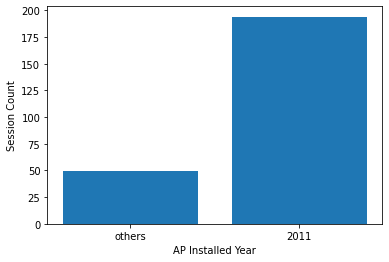

In [207]:
x = ['others', '2011']
y = [243-194,194]
plt.bar(x, y)
plt.xlabel('AP Installed Year')
plt.ylabel('Session Count')
